<a href="https://colab.research.google.com/github/priyadarshi0007/NEW-NLP_AIEngineeringPlaylist/blob/master/OCR_%2B_Translate_%2B_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install easyocr

     |████████████████████████████████| 48.4MB 91kB/s 


In [2]:
! pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 942kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=1255ef8739c5917773366ee5b317f2cfa3d584f6224f286afd3edf0210238a14
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=a4f7f42efaf8318159bc8f4c407fc59ef9cbddddb7b4325972c2fd9139dbe6dd
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [3]:
!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=60067be6ce34c8b1f7f597b61db2b807284fa7b902bd374c11da764ec31875a3
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [4]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-08-16 20:26:31--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.3.35, 104.16.2.35, 104.16.30.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.3.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-08-16 20:26:31 (89.2 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [5]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import  Audio

In [6]:
reader = easyocr.Reader(['ta'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


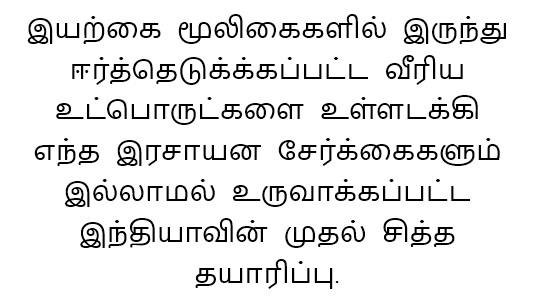

In [7]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('mk1jX.jpg')
im

In [8]:
bounds = reader.readtext('mk1jX.jpg',
                         decoder='beamsearch', #options are 'greedy', 'beamsearch' and 'wordbeamsearch'.
                         beamWidth = 5,    #How many beam to keep when decoder = 'beamsearch' or 'wordbeamsearch
                         batch_size = 1,   #batch_size>1 will make EasyOCR faster but use more memory
                         workers = 0,      #Number thread used in of dataloade
                         allowlist = None, #Force EasyOCR to recognize only subset of characters. Useful for specific problem (E.g. license plate, etc.)
                         blocklist = '=.', #Block subset of character. This argument will be ignored if allowlist is given.
                         detail =1,        #Set this to 0 for simple output
                         paragraph = False,#Combine result into paragraph
                         contrast_ths = 0.5,
                         adjust_contrast = 0.7,
                         filter_ths = 0.003,
                         text_threshold = 0.7, #Text confidence threshold
                         low_text = 0.4,    #Text low-bound score
                         link_threshold=0.8,#Link confidence threshold
                         canvas_size = 2560,#Maximum image size. Image bigger than this value will be resized down.
                         mag_ratio = 1.5,   #Image magnification ratio
                         slope_ths = 0.2,   #Maximum slope (delta y/delta x) to considered merging. Low value means tiled boxes will not be merged.
                         ycenter_ths = 0.5, #Maximum shift in y direction. Boxes with different level should not be merged.
                         height_ths = 0.7,  #Maximum different in box height. Boxes with very different text size should not be merged.
                         width_ths = 0.7,   #Maximum horizontal distance to merge boxes. 
                         add_margin = 0.55)  #Extend bounding boxes in all direction by certain value. This is important for language with complex script 

In [9]:
bounds

[([[34, 0], [525, 0], [525, 66], [34, 66]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.18629176914691925),
 ([[52, 37], [482, 37], [482, 103], [52, 103]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.03348412364721298),
 ([[37, 76], [496, 76], [496, 142], [37, 142]],
  'உட்பொருட்களை உள்ளடக்கி',
  0.10234247893095016),
 ([[15, 119], [519, 119], [519, 185], [15, 185]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.1451711356639862),
 ([[44, 156], [488, 156], [488, 226], [44, 226]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.40602222084999084),
 ([[55, 191], [479, 191], [479, 275], [55, 275]],
  'இந்தியாவின் முதல் சித்த',
  0.14289142191410065),
 ([[175, 239], [358, 239], [358, 303], [175, 303]],
  'யாரிப்பு',
  0.3346027135848999)]

In [10]:
def draw_boxes(image,bounds,color = 'green',width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3], fill = color,width = width)
  return image



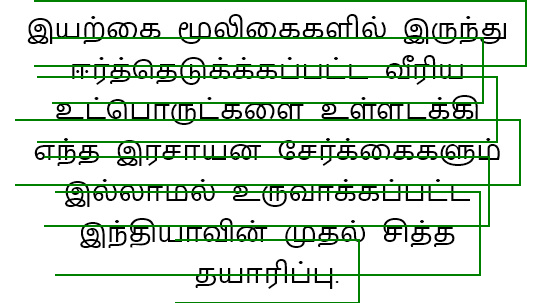

In [11]:
draw_boxes(im,bounds)

In [15]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)

In [16]:
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [17]:
text_comb = ' '.join(text_list)

In [18]:
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [19]:
text_en = translator.translate(text_comb,src='ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [20]:
ta_tts = gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [21]:
Audio('trans.mp3',autoplay= True)

In [22]:
ta_tts = gTTS(text_en.text, lang='en-in')
ta_tts.save('trans.mp3')

In [23]:
Audio('trans.mp3',autoplay= True)

In [24]:
ta_tts = gTTS(text_en.text, lang='hi')
ta_tts.save('trans.mp3')

In [25]:
Audio('trans.mp3',autoplay= True)

In [28]:
tex_hi = translator.translate(text_comb,src='ta',dest='hi')
print(tex_hi.text)

प्राकृतिक जड़ी बूटियों से निकाले गए सक्रिय तत्वों से युक्त किसी भी रासायनिक योजक के बिना भारत का पहला असाधारण उत्पाद


In [30]:
ta_tts = gTTS(tex_hi.text, lang='hi')
ta_tts.save('trans.mp3')

In [31]:
Audio('trans.mp3',autoplay= True)